In [9]:
!pip install opencv-python mediapipe matplotlib

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/e4/a5/d652d2508064bde4161cdcf7623aa95e4fc71bd0ed6ca62badb93a10a156/mediapipe-0.10.8-cp310-cp310-win_amd64.whl.metadata
  Using cached mediapipe-0.10.8-cp310-cp310-win_amd64.whl.metadata (9.8 kB)
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=2.0 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     -------------------------------------- 904.0/904.0 kB 5.7 MB/s eta 0:00:00
     ------------------------------------- 199.7/199.7 kB 12.6 MB/s eta 0:00:00
   ---------------------------------------- 50.5/50.5 MB 21.1 MB/s eta 0:00:00
   ---------------------------------------- 130.2/130.2


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install tensorflow sklearn

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/7c/3c/049400232ee2897d613db9009e42269417166c3f8519d46e5c97b6f9e206/tensorflow-2.15.0-cp310-cp310-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl.metadata (3.6 kB)
Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!pip install pyttsx3

  Obtaining dependency information for comtypes from https://files.pythonhosted.org/packages/c2/a7/fe4bd49b5c4afa7a7ed3852abda6909e48c00715e6a134e47055381113aa/comtypes-1.2.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 184.3/184.3 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pyttsx3

In [2]:
mp_holistic = mp.solutions.holistic  #holistic model
mp_drawing = mp.solutions.drawing_utils #Draw utilities

In [3]:
def mediapipe_detection (image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR CONVERSION
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #COLOR CONVERSION
    return image, results

In [120]:
def draw_landmark(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [121]:
def draw_style_landmark(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

In [86]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read
        ret, frame = cap.read()
        #Make detection
        image, results = mediapipe_detection(frame, holistic)
        #Draw landmarks
        draw_style_landmark(frame, results)
        #show to screen
        cv2.imshow('Opencv Feed', frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
draw_landmark(frame, results)

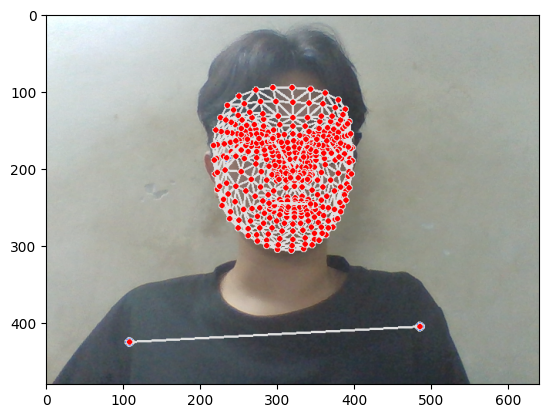

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [91]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

#Actions that we try to detect
actions = np.array([ 'none', 'hello', 'i like you', 'nice to meet', '1', '10', 'cat', 'dog', 'sleep', 'look', 'eat', 'learn', 'good', 'deaf'])
#actions = np.array(['deaf'])
# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [92]:
actions

array(['none', 'hello', 'i like you', 'nice to meet', '1', '10', 'cat',
       'dog', 'sleep', 'look', 'eat', 'learn', 'good', 'deaf'],
      dtype='<U12')

In [38]:
dict_actions = {}
with open("actions.txt") as f:
    for line in f:
       (key, val) = line.split('-')
       if (val[-1]=='\n'):
          dict_actions[str(key)] = val[:-1]
       else:
          dict_actions[str(key)] = val
actions = list(dict_actions.keys())
#actions = actions[:3]
actions = np.array(actions)
actions


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 159: character maps to <undefined>

In [87]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [88]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_style_landmark(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    #cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    #cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [93]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [94]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'none': 0,
 'hello': 1,
 'i like you': 2,
 'nice to meet': 3,
 '1': 4,
 '10': 5,
 'cat': 6,
 'dog': 7,
 'sleep': 8,
 'look': 9,
 'eat': 10,
 'learn': 11,
 'good': 12,
 'deaf': 13}

In [95]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [96]:
sequences
# np.save('sequences.npy', np.array(sequences, dtype='float64'), allow_pickle=True)
# a = np.load('sequences.npy', allow_pickle=True)
# a
#labels

[[array([ 0.55430722,  0.63863909, -1.37589979, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5787679 ,  0.53394336, -1.57894373, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.58921635,  0.51283824, -1.61348093, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59349233,  0.5198527 , -1.61575437, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59703743,  0.52333933, -1.69701743, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59636253,  0.52799886, -1.67112422, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59506267,  0.52619952, -1.73073936, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59270656,  0.52733147, -1.73452508, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.59008497,  0.52811617, -1.70489907, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.58051193,  0.52967018, -1.68394911, ...,  0.        ,
       

In [103]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [104]:
X.shape

(420, 30, 1662)

In [105]:
#npy_path = os.path.join(os.path.join('train'), 'X.npy')
#np.save(npy_path, np.array(X, dtype='float64'), allow_pickle=True)
#b = np.load(npy_path, allow_pickle=True)
#b
print(y)
y.shape

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


(420, 14)

In [106]:
#save X
X_npy_path = os.path.join(os.path.join('train'), 'X.npy')
np.save(X_npy_path, np.array(X, dtype='float64'), allow_pickle=True)
#save y
y_npy_path = os.path.join(os.path.join('train'), 'y.npy')
np.save(y_npy_path, np.array(y, dtype='float64'), allow_pickle=True)
#save sequences
# sequences_npy_path = os.path.join(os.path.join('train'), 'sequences.npy')
# np.save(sequences_npy_path, np.array(sequences, dtype='float64'), allow_pickle=True)
# #save labels
# labels_npy_path = os.path.join(os.path.join('train'), 'labels.npy')
# np.save(labels_npy_path, np.array(sequences, dtype='float64'), allow_pickle=True)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [109]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=True, activation='relu'))
# model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [110]:
model.load_weights('action.h5')

In [112]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [113]:
yhat = model.predict(X_test)

2/2 [==============================] - 2s 20ms/step


In [114]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [115]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[38,  0],
        [ 0,  4]],

       [[39,  0],
        [ 0,  3]],

       [[39,  0],
        [ 0,  3]],

       [[38,  0],
        [ 0,  4]],

       [[40,  0],
        [ 0,  2]],

       [[40,  0],
        [ 0,  2]],

       [[41,  0],
        [ 0,  1]],

       [[40,  0],
        [ 0,  2]],

       [[40,  0],
        [ 0,  2]],

       [[38,  0],
        [ 0,  4]],

       [[39,  0],
        [ 0,  3]],

       [[36,  0],
        [ 0,  6]],

       [[37,  0],
        [ 0,  5]],

       [[41,  0],
        [ 0,  1]]], dtype=int64)

In [116]:
accuracy_score(ytrue, yhat)

1.0

In [117]:
colors = [(245,117,16)]
def prob_viz(res, actions[1:], input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[0], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.75
engine = pyttsx3.init()
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        #print(results)
        
        # Draw landmarks
        draw_style_landmark(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            #print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1] and actions[np.argmax(res)] != 'none':
                        sentence.append(actions[np.argmax(res)])
                        engine.say(str(actions[np.argmax(res)]))
                        engine.runAndWait()
                        # cv2.putText(image, 'wait', (120,200), 
                        #        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        #cv2.waitKey(1000)
                else:
                    if actions[np.argmax(res)] != 'none':
                        sentence.append(actions[np.argmax(res)])
                        engine.say(str(actions[np.argmax(res)]))
                        engine.runAndWait()
                        # cv2.putText(image, 'wait', (120,200), 
                        #        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        #cv2.waitKey(1000)

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 47ms/step


In [52]:
sentence
actions[np.argmax(res)]

'none'

In [ ]:
cap.release()
cv2.destroyAllWindows()